In [1]:
import glob
import numpy as np
import cv2
from PIL import Image
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

filelist = glob.glob("./CalibImages/*.JPG")
filelist

['./CalibImages/8.JPG',
 './CalibImages/9.JPG',
 './CalibImages/12.JPG',
 './CalibImages/13.JPG',
 './CalibImages/11.JPG',
 './CalibImages/10.JPG',
 './CalibImages/4.JPG',
 './CalibImages/5.JPG',
 './CalibImages/7.JPG',
 './CalibImages/6.JPG',
 './CalibImages/2.JPG',
 './CalibImages/3.JPG',
 './CalibImages/1.JPG',
 './CalibImages/0.JPG']

In [2]:
width = 3264
length = 4928

s_wi_start = int((width - 100)/2)
s_len_start = int((length - 100)/2)

In [3]:
def shutter_speed(filelist):
    speed_arr = []
    for file in filelist:
        exif_data = Image.open(file)._getexif()
        speed = float(10/exif_data[33434][1])
        speed_arr.append(speed)
    return speed_arr
speed_arr = shutter_speed(filelist)
log_speed = np.log(speed_arr)

In [4]:
def channels(filelist):
    count = 0
#     red_arr = []
#     green_arr = []
#     blue_arr = []
    for file in filelist:
        img = cv2.imread(file)

        if count == 0:
            red_arr = img[s_wi_start:s_wi_start + 100, s_len_start:s_len_start + 100, 0]
            green_arr = img[s_wi_start:s_wi_start + 100, s_len_start:s_len_start + 100, 1]
            blue_arr = img[s_wi_start:s_wi_start + 100, s_len_start:s_len_start + 100, 2]
        else: 
            red = img[s_wi_start:s_wi_start + 100, s_len_start:s_len_start + 100, 0]
            green = img[s_wi_start:s_wi_start + 100, s_len_start:s_len_start + 100, 1]
            blue = img[s_wi_start:s_wi_start + 100, s_len_start:s_len_start + 100, 2]

            red_arr = np.dstack((red_arr, red))
            green_arr = np.dstack((green_arr, green))
            blue_arr = np.dstack((blue_arr, blue))
        count += 1
    return red_arr, green_arr, blue_arr
red_arr, green_arr, blue_arr = channels(filelist)
# plt.imshow(img_crop)
# plt.show()

In [5]:
red_mean = np.mean(red_arr, axis = (0,1))
green_mean = np.mean(green_arr, axis = (0,1))
blue_mean = np.mean(blue_arr, axis = (0,1))

log_red = np.log(red_mean)
log_green = np.log(green_mean)
log_blue = np.log(blue_mean)

a = 0.557020112103
g = 1.79526731311
b = 7.50635225514


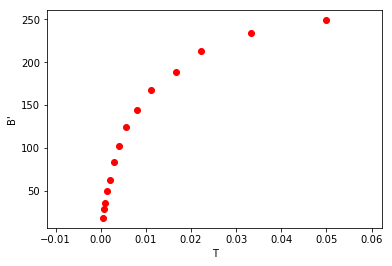

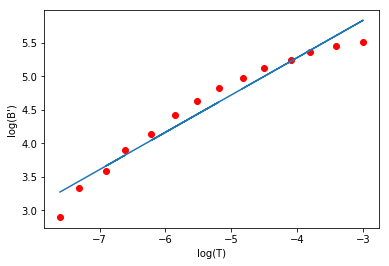

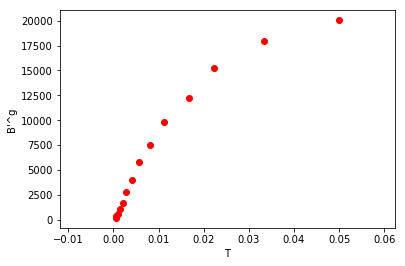

a = 0.53851727568
g = 1.85695064051
b = 7.42782628693


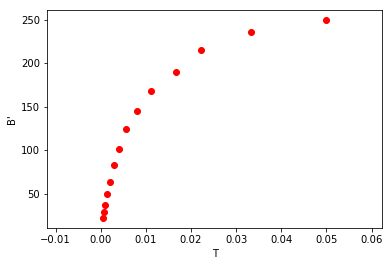

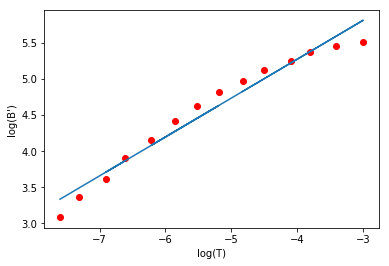

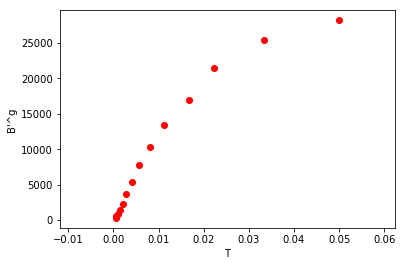

a = 0.589123283607
g = 1.69743757856
b = 7.56462371849


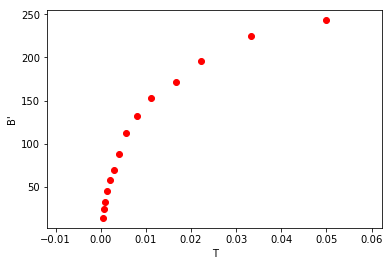

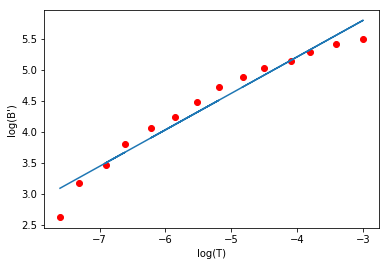

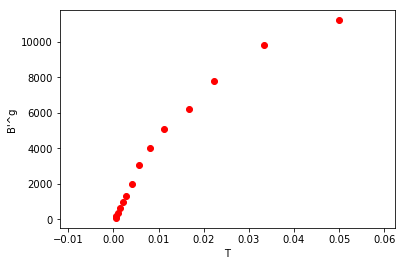

In [6]:
regr = linear_model.LinearRegression()

def training(speed_arr, log_speed, mean, log_mean):

    x = np.array(log_speed).reshape(len(log_speed),1)
    y = np.array(log_mean).reshape(len(log_mean),1)
    regr.fit(x, y)
    a = regr.coef_[0][0]
    b = regr.intercept_[0]
    g = 1/a
    print('a =', a)
    print('g =', g)
    print('b =', b)
    y_predict = regr.predict(x)
  
    plt.scatter(speed_arr, mean, color ='Red')
    plt.xlabel('T')
    plt.ylabel('B\'')
    plt.show()
    
    plt.scatter(x,y,color ='Red')
    plt.plot(x,y_predict)
    plt.plot()
    plt.xlabel('log(T)')
    plt.ylabel('log(B\')')
    plt.show()

    plt.scatter(speed_arr,np.power(mean,g),color ='Red')
    plt.xlabel('T')
    plt.ylabel('B\'^g')
    plt.show()

    
training(speed_arr, log_speed, red_mean, log_red)
training(speed_arr, log_speed, green_mean, log_green)
training(speed_arr, log_speed, blue_mean, log_blue)
